In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.cm import ScalarMappable
import os
import numpy as np
import matplotlib

In [6]:
# Plotting settings
import matplotlib.colors as colors
import mplhep as hep
plt.style.use(hep.style.ROOT)
matplotlib.rcParams.update({'font.size': 20})

## PCA for H2O and CO2 bond angle changes

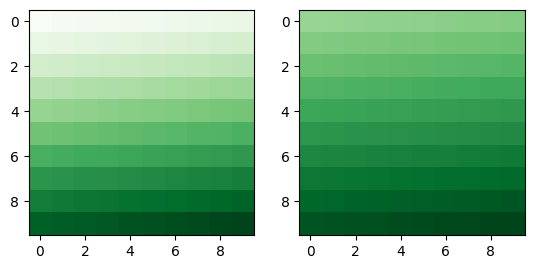

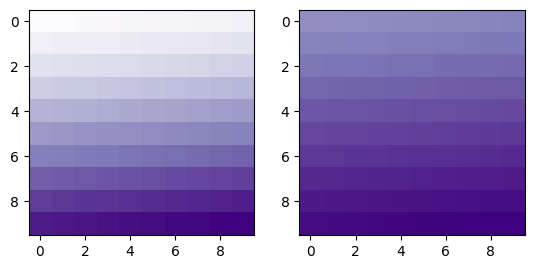

In [23]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

arr = np.linspace(0, 50, 100).reshape((10, 10))
fig, ax = plt.subplots(ncols=2)

cmap = plt.get_cmap('Greens')
new_greens = truncate_colormap(cmap, 0.4, 1)
ax[0].imshow(arr, interpolation='nearest', cmap=cmap)
ax[1].imshow(arr, interpolation='nearest', cmap=new_greens)
plt.show()
fig, ax = plt.subplots(ncols=2)

cmap = plt.get_cmap('Purples')
new_purples = truncate_colormap(cmap, 0.55, 1)
ax[0].imshow(arr, interpolation='nearest', cmap=cmap)
ax[1].imshow(arr, interpolation='nearest', cmap=new_purples)
plt.show()

In [8]:
def create_PCA(functions, titles, change_type):

    # create PCA
    fig, axs = plt.subplots(2, 2, figsize = (10, 9))
        
    for ax, func, title in zip (axs.flatten()[:-2], functions, titles): 

        file = 'PCA/ACE/%s/%s_%s.npz'%('bond_delta', func, change_type)
        data = np.load(file)
        all_colors = data['colors']
        all = data['ACE']

        pca = PCA(n_components=2)
        ACE_pca = pca.fit_transform(all)

        
        sc = ax.scatter(ACE_pca[:,0], ACE_pca[:,1], c=all_colors)
        ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
 
        
        ax.set_title(title)
        ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

    for ax, func, title in zip (axs.flatten()[1:], functions[1:], titles[1:]): 

        file = 'PCA/ACE/%s/%s_%s.npz'%('alignment_angle', func, 'alignment_angle')
        data = np.load(file)
        all_colors = data['colors']
        all = data['ACE']

        pca = PCA(n_components=2)
        ACE_pca = pca.fit_transform(all)

        
        sc = ax.scatter(ACE_pca[:,0], ACE_pca[:,1], c=all_colors)
        ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
 
        
        ax.set_title(title)
        ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    
    axs[0][0].set_ylabel('Principal Component 2')
    axs[1][0].set_ylabel('Principal Component 2')
    axs[1][0].set_xlabel('Principal Component 1')
    axs[1][1].set_xlabel('Principal Component 1')

    smb = plt.cm.ScalarMappable(cmap=new_purples)
    smr = plt.cm.ScalarMappable(cmap=new_greens)
    fig.subplots_adjust(right=0.75)
    cbar_ax = fig.add_axes([0.77, 0.55, 0.02, 0.3])
    cbar = fig.colorbar(smb, cax=cbar_ax)
    cbar.set_ticklabels(np.round(np.linspace(-45, 45, 6),1))
    cbar_ax = fig.add_axes([0.85, 0.55, 0.02, 0.3])
    cbar = fig.colorbar(smr, cax=cbar_ax)
    cbar.set_ticklabels(np.round(np.linspace(-45, 45, 6),1))


    cbar_ax = fig.add_axes([0.77, 0.15, 0.02, 0.3])
    cbar = fig.colorbar(smb, cax=cbar_ax)
    cbar.set_ticklabels(np.round(np.linspace(-0.5, 0.5, 6),1))
    cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.3])
    cbar = fig.colorbar(smr, cax=cbar_ax)
    cbar.set_ticklabels(np.round(np.linspace(-0.5, 0.5, 6),1))
    plt.savefig('pca_simple.png')

In [10]:
functions = ['chebyshev', 'fourier', 'chebyshev', 'fourier']
titles = ['Chebyshev', 'Fourier', 'Chebyshev', 'Fourier']
change_type = 'bond_delta'
create_PCA(functions, titles, change_type)

# PCA Variance
Create a heatmap of the variance of PCA plots for different cutoffs and basis

In [11]:
import seaborn as sn

In [2]:

def make_heatmap_one_basis(cutoffs, basis, titles):
    
    fig, axs = plt.subplots(1, len(cutoffs), figsize = (13, 4), sharey = True)
        
    for axis, cutoff, title in zip (axs[:-1], cutoffs[:-1], titles[:-1]): 

        store_folder = 'PCA/heatmap'
        file = '%s/norm_cutoff_%s_basis_%s.npy'%(store_folder, cutoff, basis)

        arr = np.load(file)

        # Define x and y axis labels and values
        x_labels = [2, 4, 6, 8, 10]
        y_labels = [2, 4, 6, 8, 10]

        # Create heatmap with Seaborn
        ax = sn.heatmap(arr, cmap = 'PRGn', cbar=False, ax=axis)  # You can adjust the center value if needed

        # Set x-axis and y-axis tick labels and centers them
        axis.set_xticks(np.arange(len(x_labels)) + 0.5)
        axis.set_xticklabels(x_labels, ha='center')
        axis.tick_params(left=False, bottom=False)

        axis.set_xlabel('L max', fontsize=12)
        # Add a title
        axis.set_title(title, fontsize=14)
        axis.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    

    #print(y_labels) 

    store_folder = 'PCA/heatmap'
    file = '%s/norm_cutoff_%s_basis_%s.npy'%(store_folder, cutoffs[-1], basis)

    arr = np.load(file)
   
    # Set x-axis and y-axis labels
    cbar_ax = fig.add_axes([.92, .12, .02, .75])
    sc = sn.heatmap(arr, cmap = 'PRGn', ax=axs[-1], cbar_ax = cbar_ax)
    #plt.colorbar(sc, ax=axs[-1], orientation='vertical')
    axs[-1].set_title(titles[-1])
    axs[-1].tick_params(left=False, bottom=False)
    axs[-1].set_xlabel('L max', fontsize=12)
    axs[-1].set_xticklabels(x_labels, ha='center')
    axs[-1].set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

    axs[0].set_ylabel('N max', fontsize=12)
    axs[0].set_yticklabels(y_labels, rotation=45, ha='right', va='center') 
    axs[0].set_yticks(np.arange(len(y_labels)) + 0.5, labels=y_labels)


In [12]:
make_heatmap_one_basis([4, 6, 8], 'chebyshev', ['Cutoff Four', 'Cutoff Six', 'Cutoff Eight'])